# <font color='#3d59c6'> MD004 SESIÓN ESTADÍSTICA DESCRIPTIVA  </font>



Utilizaremos el conjunto de datos **20241106_DataAbalone** para todo el ejemplo

Los abalones o haliótidos (Haliotidae) son una familia de moluscos gasterópodos. 
Son conocidos como orejas de mar, aunque se les conoce con otros nombres dependiendo del país: orea, señoritas, cribias, manquilinas, seis ojos, oreja de Venus, lapa burra y carne de pez

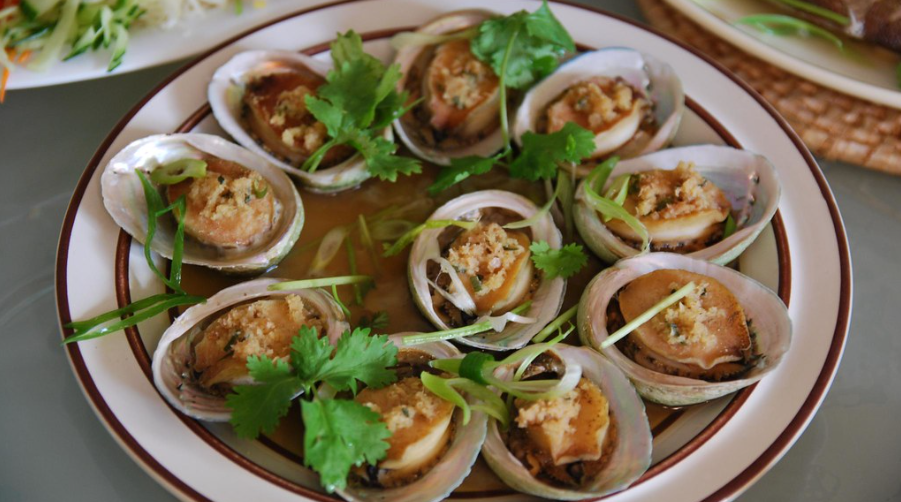


<font color='#3d59c6'>**DATA**</font>: 
- **Sexo** (M: Masculino, F: Femenino, I: Infante) 
- **Longitud** - Medida de la carcasa más larga (milímetros - mm)
- **Diámetro** - mm
- **Altura** - con carne con cáscara (mm)
- **Peso del abulón entero** (gramos)
- **Peso de la carne** (gramos)
- **Peso visceras** después del sangrado (gramos)
- **Peso de la cáscara** - después de secarse (gramos)
- **Anillos**: el valor + 1,5 da la edad en años (p. ej., 4 = 5,5 años)


<font color='#3d59c6'>**OBJETIVO SESIÓN PRÁCTICA:**</font>

- extraer conocimiento a través de los datos
- obtener caracteristicas representativas de nuestras variables
-....

**¿Para qué?**
- validaciones, aportar nueva información de valor, buscaar contestar una pregunta,...

**¿Que tipo de pregunta podriamos responder con este dataset? o ¿qué podriamos solucionar?**
- Imaginemos que los Abalone con Genero=I son más caros y tenemos operarios separandolos a mano, a lo mejor queremos automatizar el proceso programando una máquina que separe los Abalone en 2 grupos (I vs F+M) en función de 'x' parámetros
- ....más ejemplos

<font color='#3d59c6'>**PASOS:**</font> 

0. Carga de Packages
1. Carga de datos
2. Realizar análisis descriptivo:
    - principales estadísticos
    - análisis diferentes variables
    - graficación
4. Conclusión

## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

- **pastecs:** nos da herramientas para el análisis estadístico básico, especialmente útil para descripciones de datos (funciones: str,stat.desc, table,plot,...)
- **modeest:** la usaremos para el cálculo de la moda y otras medidas de tendencia central
- **vcd:** tiene herramientas para la visualización y el análisis de datos categóricos y tablas de contingencia. Además, complemente ggplo2
- **dplyr:** manipulación y transformación de datos >> group_by(), summarize()
- **scales:** útil para graficación
- **agricolae:** crear tablas de frecuencias agrupadas
- **car:** nos permite crear gráficos de probabilidad (Q-Q plots) para verificar la normalidad de los datos
- **ggplot2**: la usamos para crear gráficos más personalizables o dicho de otra manera, podremos crear visualizaciones complejas.

In [1]:
install.packages("pastecs")
library(pastecs)
install.packages("modeest")
library(modeest) 
install.packages("vcd")
library(vcd)
library(dplyr) #>> manipulación de datasets: group_by(), summarize()
library(scales) #útil para graficación
install.packages("agricolae")
library(agricolae)  #>> crear tablas de frecuencias agrupadas
install.packages("ggplot2")
library(ggplot2) #>> graficación
install.packages("car")
library(car) #lo necesitamos para el qqPlot

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: grid


Attaching package: ‘dplyr’


The following objects are masked from ‘package:pastecs’:

    first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘agricolae’


The following object is masked from ‘package:modeest’:

    skewness


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’


Warning message in install.packages("car"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning messa

ERROR: Error in library(car): there is no package called ‘car’


In [2]:
unloadNamespace("scales")
install.packages(c("ggplot2", "scales"))
library(ggplot2)

ERROR: Error in unloadNamespace("scales"): namespace ‘scales’ is imported by ‘ggplot2’ so cannot be unloaded


## CARGA DE DATOS

In [ ]:
#subimos el fichero 20241106_DataAbalone.csv a nuestro entorno jupyter 
#carpeta donde vayamos a desarrollar el código
#cargamos nuestro dataset en data_ab y checkeamos los datos cargados

data_ab <- read.csv(file='202511S2_DataAbalone.csv', header=TRUE, sep=';', dec=',')
head(data_ab)#de forma predefinida retorna las primeras 6 observations
tail(data_ab)#de forma predefinida retorna las últimas 6 observations

head(data_ab,10)#indicamos cuantas observaciones queremos
data_ab[1,]#si queremos mostrar solo una fila concreta

In [ ]:
#observamos el tipo de datos, cuantos registros tiene el dataset y cuantas variables
str(data_ab) 

Nos indica que nuestro "objeto" es un dataframe, tenemos 4177 observaciones y 10 variables...

## Min;Max

Obtener el valor mínimo y máximo de una variable

In [ ]:
cat("El valor mínimo de la variable Longitud es: ", min(data_ab$Longitud))

In [ ]:
cat("El valor máximo de la variable Longitud es: ", max(data_ab$Longitud))

In [ ]:
#la función rng constará de un vector de 2 posiciones donde se almacena el mínimo y máximo [min,max].
rng = range(data_ab$Longitud)
rng
rng[1]
rng[2]
cat("min = " ,rng[1],"; max = ",rng[2])

## Media

Obtener la media de una variable mediante la función **mean()**

In [ ]:
mean(data_ab$Longitud)

#OBSERVACIÓN: Si hay valores faltantes, utilizar na.rm = TRUE (los excluye)
mean(data_ab$Longitud, na.rm = TRUE)

In [ ]:
#función para saber si existen NA dentro de nuestro dataset
sum(is.na(data_ab))

## Mediana

Obtener la mediana de una variable mediante la función **median()**

¿Qué observamos respecto a la media?

In [ ]:
#La medianq se puede calcular con la función median()
median(data_ab$Longitud)
#o con la función quantile()
quantile(data_ab$Longitud, 0.5)

## Primer y tercer cuartil

Obtener el primer y el tercer cuartil de una variable

In [ ]:
#primer cuartil
quantile(data_ab$Longitud, 0.25)
#segundo cuartil
quantile(data_ab$Longitud, 0.75)

El rango intercuartil (es decir, la diferencia entre el primer y tercer cuartil) se puede calcular con la función IQR()

In [ ]:
IQR(data_ab$Longitud)

## Desviación estándar y varianza

Calculemos la desviación estándar y la varianza

In [ ]:
sd(data_ab$Longitud) #desviación estandard
var(data_ab$Longitud) #variación

Para calcular un estadítico para varias variables al mismo tiempo, utilizar **lapply()**

In [ ]:
lapply(data_ab[, 3:10], mean)

In [ ]:
lapply(data_ab[, 3:10], var)

## Coeficiente de variación y Moda

In [ ]:
cat("coeficiente de variación: ", sd(data_ab$Longitud) / mean(data_ab$Longitud))

¿Un coeficiente de variación próximo a 0 qué nos indica en el caso de la variable longitud?

In [ ]:
tab = table(data_ab$Anillos) #número de ocurrencias por cada valor
sort(tab, decreasing = TRUE) # ordenamos ascedente o descendente

In [ ]:
#También lo podemos hacer para una variable categórica
sort(table(data_ab$Genero), decreasing = TRUE)

## Resumen de estimadores

In [ ]:
#Una manera más rápida y compacta de obtener todos los estadísticos sería a través de la función summary
summary(data_ab)

¿Hay datos atípicos como por ejemplo (-)? ¿qué más podemos extraer de aquí?¿Qué tal la variable peso?

**>>** Podemos decir que Longitud tiene una media de 0.52, y la  mayoría de los registros están por debajo de 0.615, además los valores van entre 0.075 y 0.815

In [ ]:
#OBSERVACIÓN: si se necesitan estas estadísticas descriptivas por grupo, use la función by()
by(data_ab, data_ab$Genero, summary)

In [ ]:
stat.desc(data_ab[, 3:10])
#OBSERVACIÓN: para tener más métricas (es decir, prueba de asimetría, curtosis y normalidad) agregando el argumento norm = TRUE
#stat.desc(data_ab[, 3:10], norm = TRUE)

#nbr.val (número de valores)
#nbr.null (número de valores null)
#nbr.na (número de missing)
#range (diferencia max-min)
#sum (suma de los valores no missing)
#SE.mean  (error estándar sobre la media)
#CI.mean.0.95 (intervalo de confianza)

In [ ]:
stat.desc(data_ab$Longitud)

## Tabla de contingencia

In [ ]:
#en este caso se usará la función table() - bajo dos variables cualitativas-
#crearemos una variable extra categorica al solo tener la de género
data_ab$Peso.Carne_cat <- ifelse(data_ab$Peso.Carne < median(data_ab$Peso.Carne),"pesoinf_m", "pesosup_m")
table(data_ab$Peso.Carne_cat)

In [ ]:
#podemos crear la tabla de contigencias mediante las funciones table() pero también mediante xtabs
table(data_ab$Genero, data_ab$Peso.Carne_cat)
xtabs(~ data_ab$Genero + data_ab$Peso.Carne_cat)

In [ ]:
#lo mismo pero por frecuencias relativas
t_ab = table(data_ab$Genero, data_ab$Peso.Carne_cat)
round(prop.table(table(data_ab$Genero, data_ab$Peso.Carne_cat)), 2)
round(prop.table(t_ab), 2)

In [ ]:
# % por fila:
print("% por filas")
round(prop.table(table(data_ab$Genero, data_ab$Peso.Carne_cat), 1), 2) #con la función round() redondeamos a 'x' dígitos
# % por columna:
print("% por columnas")
round(prop.table(table(data_ab$Genero, data_ab$Peso.Carne_cat), 2), 2)

## Tablas de frecuencias

In [ ]:
#Podemos crear una tabla de frecuencias a partir de una variable continua
Fabs = hist(data_ab$Longitud, plot=FALSE)
Tabla1 = table.freq(Fabs)

Fabs
Tabla1

## TOP N

Cuando queramos listar por ordenación partiendo de una variable y seleccionar los Top n:

In [ ]:
#columnas que nos interesan:
col = c('Id'
        ,'Peso.Carne')

#pintamos la lista
head(data_ab[,(col)][order(-data_ab$Peso.Carne),], 10)

## GRAFICOS

## Barplot

**>>** solo sobre en variables <b>cualitativas</b>

**>>** se usa para visualizar la distribución de una variable cualitativa

In [ ]:
barplot(table(data_ab$Genero)
        ,col=c("#93c47d","#7facff","#f6b26b")
        ,border="#668957") #partiremos del resultado de table()

#también se puede realizar sobre tabla de frecuencias relativas
barplot(prop.table(table(data_ab$Genero))
        ,col=c("#93c47d","#7facff","#f6b26b")
        ,border="#668957")

In [ ]:
plotdata = data_ab %>%
 count(Genero) #esta será nuestra n
ggplot(plotdata, 
       aes(x = Genero 
           ,y = n)) + 
 geom_bar(stat = "identity" #le indicamos que ya está calculada la frecuencia y que coja esa
         ,fill = "#f6b26b" #color de relleno
         ,color = "white") + #color borde
 geom_text(aes(label = n) 
          ,vjust=-0.9) + #dónde coloca el valor
 labs(x = "Género" #título eje x
      ,y = "Freq" #título eje y
      ,title = "Abolone por Género") #título del gráfico

## Mosaico

Nos permite ver la relación entre variables categóricas las áreas de los rectángulos representan la
proporción de las diferentes combinaciones.

In [ ]:
#Un diagrama de mosaico permite visualizar una tabla de contingencia de dos variables cualitativas:
mosaicplot(table(data_ab$Genero, data_ab$Peso.Carne_cat),
  ,main = "Genero x Peso"
  ,color = TRUE #
  ,xlab = "Género" #eje de las x
  ,ylab = "Peso.Carne_cat" #eje de las y
)

## Histogramas

In [ ]:
hist(data_ab$Diametro #índicamos variable
     ,main = "Distribución Diametro def. bins=Sturges" #título del gráfico
     ,breaks="Sturges" #particiones
     ,xlab = "Peso" #nombre variable eje x
     ,ylab = "Volumen" #nombre variable eje y
     ,col = "#93c47d" #color de relleno
     ,border="white") #color de contorno
hist(data_ab$Diametro 
     ,main = "Distribución Diametro def. bins=25"
     ,breaks=25 #aquí se le indica el núm de bins de forma manual
     ,xlab = "Diametro" 
     ,ylab = "Volumen" 
     ,col = "#93c47d"
     ,border="white")

In [ ]:
ggplot(data_ab) + #señalamos el dataframe
  aes(x = Peso.Carcasa) + #indicamos la variable 
  geom_histogram(bins = 15 #indicamos número de bins
                ,fill = "#d5a6bd"#color de relleno
                ,color = "white") + #color del contorno
  labs(title="Distribución por peso" #título del gráfico
      ,subtitle = "núm.bins = 15"
      ,x = "Peso.Carcasa")  #nombre variable eje x

In [ ]:
#mismo gráfico pero filtramos
data_ab %>%
filter( Genero=='I') %>%
ggplot(aes(x = Peso.Carcasa)) + #indicamos la variable 
  geom_histogram(bins = 15 #indicamos número de bins
                ,fill = "#d5a6bd"#color de relleno
                ,color = "white") + #color del contorno
  labs(title="Distribución por peso" #título del gráfico
      ,subtitle = "núm.bins = 15"
      ,x = "Peso.Carcasa")  #nombre variable eje x

## Boxplot 

In [ ]:
boxplot(data_ab$Peso.Carcasa
        ,col = "#9fc5e8"
        ,border="#0b5394"
        ,main = "Boxplot Peso.Carcasa" #título del gráfico
        )

In [ ]:
boxplot(data_ab$Diametro ~ data_ab$Genero
        ,col = "#9fc5e8"
        ,border="#0b5394"
        ,main = "Boxplot Peso.Carcasa x género" #título del gráfico        
        )

In [ ]:
ggplot(data_ab) +
  aes(x = Genero, y = Peso, fill=Genero) + #a través delparámetro fill le indicamos que pinte por género
  geom_boxplot() +
  scale_fill_brewer(palette="Dark2")+ #le indicamos que use la paleta de colores 'x'
  labs(title = "Boxplot Peso x género" ) #+
  #geom_jitter(color="#9fc5e8", size=0.7, alpha=0.5) #para visualizar la distribución de los registros (si resulta de ayuda)

## Scatterplot

In [ ]:
plot(data_ab$Diametro, data_ab$Longitud,pch = 19,col = factor(data_ab$Genero))
legend("topleft"
       ,legend = levels(factor(data_ab$Genero))
       ,pch = 19 #indica el tipo de forma, en este caso dots
       ,col = factor(levels(factor(data_ab$Genero))))

In [ ]:
data_ab2 = data_ab[data_ab$Genero=="I",]
plot(data_ab2$Diametro, data_ab2$Longitud,pch = 19 ,col = c("#0b5394","#f6b26b"))
# Legend
legend("topleft"
       ,legend = levels(factor(data_ab2$Peso.Carne_cat))
       ,pch = 19
       ,col = c("#0b5394","#f6b26b"))

In [ ]:
ggplot(data_ab) +
  aes(x = Diametro
      , y = Longitud
      , colour = Genero
      , shape = Peso.Carne_cat) + #shape le añade una capa extra de información
  scale_fill_brewer(palette="Dark2")+
  geom_point() +
  scale_color_hue() +
  labs(title = "Boxplot Longitud x género x grupo_carcasa * " )

## Gráfico QQ

Generaremos este gráfico cuando queramos ver visualmente de una forma rápida si nuestra variable muestral mantiene o no de una distribución, en este caso la normal

In [ ]:
# Draw points on the qq-plot:
qqnorm(data_ab$Longitud)
# Draw the reference line:
qqline(data_ab$Longitud)

In [ ]:
#otra forma de obtener el gráfico sería:
qqPlot(data_ab$Longitud)

## Density plot

Es la representación de la distribución de una variable numérica, vendría siendo un histograma suavizado donde el área debajo de la curva es 1

In [ ]:
plot(density(data_ab$Peso)
        ,col = "#cc0000"
        , lwd = 5
        ,main = "Densidad Longitud" #título del gráfico
    )

¿Qué puede ocurrir aquí?

In [ ]:
hist(data_ab$Peso 
     , freq = FALSE
     ,main = "Histograma y densidad"
     ,breaks=25 #aquí se le indica el núm de bins de forma manual
     ,xlab = "Peso" 
     ,ylab = "Densidad" 
     ,col = "#93c47d"
     ,border="white")
# Añadimos la línea de densidad
lines(density(data_ab$Peso), lwd = 3, col = "red")

In [ ]:
ggplot(data_ab) + #señalamos el dataframe
  aes(x = Peso) + #indicamos la variable 
  geom_histogram(bins = 15 #indicamos número de bins
                ,fill = "#d5a6bd"#color de relleno
                ,color = "white") + #color del contorno
  labs(title="Distribución por peso" #título del gráfico
      ,subtitle = "núm.bins = 15"
      ,x = "Peso")  #nombre variable eje x

data_ab %>% 
ggplot(aes(x = Peso)) + 
  geom_histogram(data = subset(data_ab,Genero=="I"),fill="#b4a7d6", colour= "white", bins = 20)+
  geom_histogram(data = subset(data_ab,Genero=="F"),fill= "#f6b26b", colour= "white", bins = 20) +
  geom_histogram(data = subset(data_ab,Genero=="M"),fill="#0b5394", colour= "white", bins = 20) +
  labs(title = "Abolone por peso")

In [ ]:
ggplot(data_ab, aes(x = Longitud)) +
 geom_density(fill = "#b4a7d6"
             ,color = "white") + 
 labs(title = "Abolone por longitud")

## Origen Dataset y Referencias

- **code.datasciencedojo**: https://code.datasciencedojo.com/datasciencedojo/datasets/blob/master/Abalone/README.md
- **Wikipedia.Haliotis**: https://es.wikipedia.org/wiki/Abalone

Autor Ejemplo: Gloria Aguilera Pérez